In [ ]:
import pandas as pd
import numpy as np

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import collections

In [ ]:
sms_spam = pd.read_csv('dataset/kaggle1.csv')
sms_spam['label_text'] = sms_spam['label_num'].apply(lambda x: 'ham' if x == 0 else 'spam')

print(sms_spam.shape)
sms_spam.head()

(5728, 3)


mail_text  label_num label_text
0  naturally irresistible your corporate identity...          1       spam
1  the stock trading gunslinger  fanny is merrill...          1       spam
2  unbelievable new homes made easy  im wanting t...          1       spam
3  4 color printing special  request additional i...          1       spam
4  do not have money , get software cds from here...          1       spam

In [ ]:
sms_spam['label_text'].value_counts(normalize=True)

ham     0.761173
spam    0.238827
Name: label_text, dtype: float64

In [ ]:
# Randomize the dataset
data_randomized = sms_spam.sample(frac=1, random_state=1)

# Calculate index for split
training_test_index = round(len(data_randomized) * 0.8)

# Split into training and test sets
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4582, 3)
(1146, 3)


In [ ]:
training_set.head(10)

mail_text  label_num label_text
0  re : 2001 budget for research  becky ,  becky ...          0        ham
1  anshuman shrivastava - visa application  ranen...          0        ham
2  reminder : cera executive roundtables in houst...          0        ham
3  position  dear dr . kaminski  my name is jaeso...          0        ham
4  re : carl tricoli  carl ,  depends if it is mo...          0        ham
5  looking for good it team ? we do software engi...          1       spam
6  heatt kills  hello , cbs / a mythicize p news ...          1       spam
7  re : research and development charges to gpg  ...          0        ham
8  follow - up on siam workshop  i am forwarding ...          0        ham
9  re : enron case study update  fantastic . i lo...          0        ham

In [ ]:
training_set['label_text'].value_counts(normalize=True)

ham     0.75993
spam    0.24007
Name: label_text, dtype: float64

In [ ]:
test_set['label_text'].value_counts(normalize=True)

ham     0.766143
spam    0.233857
Name: label_text, dtype: float64

In [ ]:
# Before cleaning
training_set.head(4)

mail_text  label_num label_text
0  re : 2001 budget for research  becky ,  becky ...          0        ham
1  anshuman shrivastava - visa application  ranen...          0        ham
2  reminder : cera executive roundtables in houst...          0        ham
3  position  dear dr . kaminski  my name is jaeso...          0        ham

In [ ]:
#Import language data
english_words = pd.read_csv('words.txt', encoding = 'UTF-8', delimiter='\n')
english_words.rename(columns = {'2': 'words'}, inplace = True)
wordlist = set(english_words['words'])

stop_words = stopwords.words('english')

In [ ]:
#Data Pre-processing
def process_message(message):  
    words = message.lower() # lowercase
    words = word_tokenize(words) # tokenization
    words = [word for word in words if len(word) > 1] # non absurd words          
    words = [word for word in words if word not in stop_words] # non stop words
    words = [word for word in words if word in wordlist] # english words
    words = [WordNetLemmatizer().lemmatize(word) for word in words] # lemmatize
    return " ".join(words)

#After cleaning
training_set['mail_text'] = training_set['mail_text'].apply(process_message)
training_set.head(10)

mail_text  label_num label_text
0  research called make sense subject research re...          0        ham
1  visa application asked visa process individual...          0        ham
2  reminder cera executive cera member friend wan...          0        ham
3  position name referred currently working energ...          0        ham
4  depends like financial insurance type hedging ...          0        ham
5  looking team software engineering team many re...          1       spam
6  kill hello mythicize overman heat death fortun...          1       spam
7  research development charge shall talk account...          0        ham
8  follow workshop forwarding attention resume ex...          0        ham
9  study update fantastic look receiving keeping ...          0        ham

In [ ]:
def create_vocabulary_matrix(vocabulary):
    word_counts_per_sms = {unique_word: [0] * len(training_set['mail_text']) for unique_word in vocabulary}

    for index, sms in enumerate(training_set['mail_text']):
       for word in sms:
          if word in vocabulary:
              word_counts_per_sms[word][index] += 1
            
    word_counts = pd.DataFrame(word_counts_per_sms)
    
    training_set_clean = pd.concat([training_set, word_counts], axis=1)
    
    return training_set_clean

In [ ]:
def count_words(data):
    counter = collections.OrderedDict()
    for message in data:
        for word in message.split(' '):
            if word in counter:
                counter[word] += 1
            else:
                counter[word] = 1
    return counter

In [ ]:
spam_messages = training_set[training_set['label_text'] == 'spam']
spam_words = count_words(spam_messages['mail_text'])
ham_messages = training_set[training_set['label_text'] == 'ham']
ham_words = count_words(ham_messages['mail_text'])

In [ ]:
def bar_chart_words(words, top=10, messages_type="", color="#1f77b4"):
    top_spam = np.array(sorted(words.items(), key=lambda x: -x[1]))[:top]
    top_words = top_spam[ : :-1, 0]
    top_words_count = [int(i) for i in top_spam[ : :-1, 1]]
    # aesthetics
    if messages_type:
        messages_type = messages_type + " " 
    plt.title(f"Top 20 most common words in {messages_type}messages")
    plt.xlabel(f"Number of words")
    plt.barh(top_words[:20], top_words_count[:20], color=color)
    plt.show()
    return top_words.tolist()

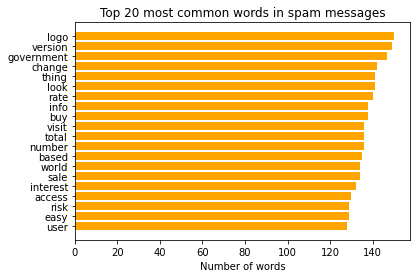

In [ ]:
top_words_spam = bar_chart_words(spam_words, top=100, messages_type="spam", color="orange")

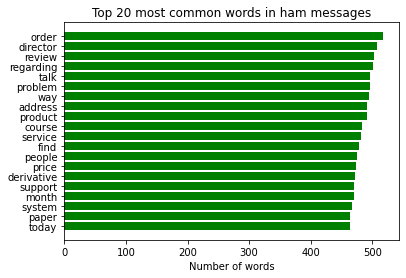

In [ ]:
top_words_ham = bar_chart_words(ham_words, top=100, messages_type="ham", color="green")

In [ ]:
# Creating the Vocabulary
training_set['mail_text'] = training_set['mail_text'].str.split()
vocabulary1 = []
for sms in training_set['mail_text']:
   for word in sms:
      vocabulary1.append(word)

vocabulary1 = list(set(vocabulary1))

training_set_clean1 = create_vocabulary_matrix(vocabulary1)
training_set_clean1.head()

mail_text  label_num label_text  \
0  [research, called, make, sense, subject, resea...          0        ham   
1  [visa, application, asked, visa, process, indi...          0        ham   
2  [reminder, cera, executive, cera, member, frie...          0        ham   
3  [position, name, referred, currently, working,...          0        ham   
4  [depends, like, financial, insurance, type, he...          0        ham   

   threatens  width  qualifies  maximum  cerise  seek  terrific  ...  mink  \
0          0      0          0        0       0     0         0  ...     0   
1          0      0          0        0       0     0         0  ...     0   
2          0      0          0        0       0     0         0  ...     0   
3          0      0          0        0       0     0         0  ...     0   
4          0      0          0        0       0     0         0  ...     0   

   foreseeable  provide  cuff  navigate  reforming  surprising  billion  \
0            0        0     0         0          0           0        0   
1            0        0     0         0          0           0        0   
2            0        0     0         0          0           0        0   
3            0        0     0         0          0           0        0   
4            0        0     0         0          0           0        0   

   table  grudging  
0      0         0  
1      0         0  
2      0         0  
3      0         0  
4      0         0  

[5 rows x 12744 columns]

In [ ]:
vocabulary2 = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'addresses', 'internet', 'order', 'mail', 'receive', 'will', 
               'people', 'report', 'address', 'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000', 'money', 
               'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 
               'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference']

training_set_clean2 = create_vocabulary_matrix(vocabulary2)
training_set_clean2.head()

mail_text  label_num label_text  \
0  [research, called, make, sense, subject, resea...          0        ham   
1  [visa, application, asked, visa, process, indi...          0        ham   
2  [reminder, cera, executive, cera, member, frie...          0        ham   
3  [position, name, referred, currently, working,...          0        ham   
4  [depends, like, financial, insurance, type, he...          0        ham   

   make  address  all  3d  our  over  remove  ...  pm  direct  cs  meeting  \
0     1        0    0   0    0     0       0  ...   0       0   0        0   
1     0        1    0   0    0     0       0  ...   0       0   0        0   
2     1        0    0   0    0     0       0  ...   0       0   0        1   
3     0        0    0   0    0     0       0  ...   0       0   0        0   
4     0        0    0   0    0     0       0  ...   0       0   0        0   

   original  project  re  edu  table  conference  
0         0        0   0    0      0           0  
1         0        0   0    0      0           0  
2         0        0   0    0      0           0  
3         0        0   0    0      0           0  
4         0        0   0    0      0           0  

[5 rows x 51 columns]

In [ ]:
vocabulary3 = set(top_words_spam + top_words_ham)

In [ ]:
# Calculating Constants 
# Isolating spam and ham messages first
spam_messages = training_set_clean1[training_set_clean1['label_text'] == 'spam']
ham_messages = training_set_clean1[training_set_clean1['label_text'] == 'ham']

# P(Spam) and P(Ham)
p_spam = len(spam_messages) / len(training_set_clean1)
p_ham = len(ham_messages) / len(training_set_clean1)

# N_Spam
n_words_per_spam_message = spam_messages['mail_text'].apply(len)
n_spam = n_words_per_spam_message.sum()

# N_Ham
n_words_per_ham_message = ham_messages['mail_text'].apply(len)
n_ham = n_words_per_ham_message.sum()

# Laplace smoothing
alpha = 1

In [ ]:
def calculate_parameter(vocabulary):
    n_vocabulary = len(vocabulary)
    
    # Initiate parameters
    parameters_spam = {unique_word:0 for unique_word in vocabulary}
    parameters_ham = {unique_word:0 for unique_word in vocabulary}

    # Calculate parameters
    for word in vocabulary:
        if word in vocabulary1:
           n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
           p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
           parameters_spam[word] = p_word_given_spam

           n_word_given_ham = ham_messages[word].sum() # ham_messages already defined
           p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
           parameters_ham[word] = p_word_given_ham
        else:
           parameters_spam[word] = alpha / (n_spam + alpha*n_vocabulary)
           parameters_ham[word] =  alpha / (n_ham + alpha*n_vocabulary)
    
    return parameters_spam, parameters_ham

In [ ]:
parameters_spam1, parameters_ham1 = calculate_parameter(vocabulary1)
parameters_spam2, parameters_ham2 = calculate_parameter(vocabulary2)
parameters_spam3, parameters_ham3 = calculate_parameter(vocabulary3)

In [ ]:
import re

def classify(parameters_spam, parameters_ham, message):
   '''
   message: a string
   '''

   message = process_message(message)
   message = message.split()
   print(message)

   p_spam_given_message = np.log(p_spam)
   p_ham_given_message = np.log(p_ham)

   for word in message:
      if word in parameters_spam:
         p_spam_given_message += np.log(parameters_spam[word])

      if word in parameters_ham: 
         p_ham_given_message += np.log(parameters_ham[word])

   print('P(Spam|message):', p_spam_given_message)
   print('P(Ham|message):', p_ham_given_message)

   if p_ham_given_message > p_spam_given_message:
      print('Label: Ham')
   elif p_ham_given_message < p_spam_given_message:
      print('Label: Spam')
   else:
      print('Equal proabilities, have a human classify this!')

In [ ]:
# Pre-test ham
classify(parameters_spam1, parameters_ham1, 'WINNER!! This is the secret code to unlock the money: C3421.')

['secret', 'code', 'unlock', 'money']
P(Spam|message): -31.938891313239736
P(Ham|message): -39.03732701711638
Label: Spam


In [ ]:
# Pre-test spam
classify(parameters_spam1, parameters_ham1, "Sounds good, Tom, then see u there")

['sound']
P(Spam|message): -10.611129761652322
P(Ham|message): -8.910892685679917
Label: Ham


In [ ]:
# # Test model
def classify_test_set(message, parameters_spam, parameters_ham):

   message = process_message(message)
   message = message.split()

   p_spam_given_message = np.log(p_spam)
   p_ham_given_message = np.log(p_ham)

   for word in message:
      if word in parameters_spam:
         p_spam_given_message += np.log(parameters_spam[word])

      if word in parameters_ham: 
         p_ham_given_message += np.log(parameters_ham[word])

   if p_ham_given_message > p_spam_given_message:
      return 'ham'
   elif p_spam_given_message > p_ham_given_message:
      return 'spam'
   else:
      return 'needs human classification'

In [ ]:
test_set['predicted1'] = test_set['mail_text'].apply(classify_test_set, args=(parameters_spam1, parameters_ham1))
test_set['predicted2'] = test_set['mail_text'].apply(classify_test_set, args=(parameters_spam2, parameters_ham2))
test_set['predicted3'] = test_set['mail_text'].apply(classify_test_set, args=(parameters_spam3, parameters_ham3))
test_set.head()

mail_text  label_num label_text  \
0  re : confirm participation at real options con...          0        ham   
1  re : alp presentation  christie ,  what about ...          0        ham   
2  re : storage model : simple issues  brad ,  he...          0        ham   
3  re : book order  thanks vince !  ?  will champ...          0        ham   
4  re : telephone interview with the enron corp ....          0        ham   

  predicted1 predicted2 predicted3  
0        ham        ham        ham  
1        ham        ham        ham  
2        ham       spam        ham  
3        ham       spam        ham  
4        ham       spam        ham

In [ ]:
def score_model(test_set, predicted_column):
    correct = 0
    total = test_set.shape[0]

    for row in test_set.iterrows():
       row = row[1]
       if row['label_text'] == row[predicted_column]:
          correct += 1

    print('Correct:', correct)
    print('Incorrect:', total - correct)
    print('Accuracy:', correct/total)

In [ ]:
score_model(test_set, 'predicted1')

Correct: 1127
Incorrect: 19
Accuracy: 0.9834205933682374


In [ ]:
score_model(test_set, 'predicted2')

Correct: 857
Incorrect: 289
Accuracy: 0.7478184991273996


In [ ]:
score_model(test_set, 'predicted3')

Correct: 1069
Incorrect: 77
Accuracy: 0.9328097731239092


In [ ]:
sms_spam2 = pd.read_csv('dataset/kaggle2.csv')
sms_spam2['label_text'] = sms_spam2['label_num'].apply(lambda x: 'ham' if x == 0 else 'spam')
sms_spam2

Unnamed: 0 label_text  \
0            605        ham   
1           2349        ham   
2           3624        ham   
3           4685       spam   
4           2030        ham   
...          ...        ...   
5166        1518        ham   
5167         404        ham   
5168        2933        ham   
5169        1409        ham   
5170        4807       spam   

                                              mail_text  label_num  
0      enron methanol ; meter # : 988291\r\nthis is ...          0  
1      hpl nom for january 9 , 2001\r\n( see attache...          0  
2      neon retreat\r\nho ho ho , we ' re around to ...          0  
3      photoshop , windows , office . cheap . main t...          1  
4      re : indian springs\r\nthis deal is to book t...          0  
...                                                 ...        ...  
5166   put the 10 on the ft\r\nthe transport volumes...          0  
5167   3 / 4 / 2000 and following noms\r\nhpl can ' ...          0  
5168   calpine daily gas nomination\r\n>\r\n>\r\njul...          0  
5169   industrial worksheets for august 2000 activit...          0  
5170   important online banking alert\r\ndear valued...          1  

[5171 rows x 4 columns]

In [ ]:
sms_spam2['predicted1'] = sms_spam2['mail_text'].apply(classify_test_set, args=(parameters_spam1, parameters_ham1))
sms_spam2['predicted2'] = sms_spam2['mail_text'].apply(classify_test_set, args=(parameters_spam2, parameters_ham2))
sms_spam2['predicted3'] = sms_spam2['mail_text'].apply(classify_test_set, args=(parameters_spam3, parameters_ham3))
sms_spam2.head()

Unnamed: 0 label_text                                          mail_text  \
0         605        ham   enron methanol ; meter # : 988291\r\nthis is ...   
1        2349        ham   hpl nom for january 9 , 2001\r\n( see attache...   
2        3624        ham   neon retreat\r\nho ho ho , we ' re around to ...   
3        4685       spam   photoshop , windows , office . cheap . main t...   
4        2030        ham   re : indian springs\r\nthis deal is to book t...   

   label_num predicted1 predicted2 predicted3  
0          0        ham        ham        ham  
1          0        ham        ham        ham  
2          0        ham        ham        ham  
3          1       spam        ham        ham  
4          0        ham        ham        ham

In [ ]:
score_model(sms_spam2, 'predicted1')

Correct: 4802
Incorrect: 369
Accuracy: 0.9286404950686521


In [ ]:
score_model(sms_spam2, 'predicted2')

Correct: 3691
Incorrect: 1480
Accuracy: 0.7137884355057049


In [ ]:
score_model(sms_spam2, 'predicted3')

Correct: 4285
Incorrect: 886
Accuracy: 0.8286598336878747
